<style>
    .custom-hr {
        border: none;
        height: 1.2px;
        background-color: #a61c00;
        margin: 20px 0;
    }
</style>
<div style="text-align: center;">
    <h1 style="color: black; font-size: 1.8em;"><em><strong>SModelS V3.0.0 beta</strong></em></h1>
</div>
<hr class="custom-hr">
<div style="text-align: left;">
    <p style="font-size: 0.8em;"><em>Yoxara Sánchez Villamizar (<a href="https://fisica.ufabc.edu.br/pt/" target="_blank">UFABC</a> &amp; <a href="http://sprace.org.br/" target="_blank">SPRACE</a>)</em></p>
    <p style="font-size: 1em;"><em>pp → Zp → jj</em></p>
</div>


In [1]:
!runSModelS.py -V

3.0.0-beta


In [2]:
import sys, re, os
from smodels.experiment.databaseObj import Database
from smodels.base.model import Model
from smodels.decomposition import decomposer
from smodels.matching.theoryPrediction import theoryPredictionsFor
from smodels.base.physicsUnits import fb, GeV
from smodels.share.models.ppZpjj import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.smodelsLogging import setLogLevel
from smodels.base import runtime
from smodels.experiment.expSMS import ExpSMS
from smodels.experiment.defaultFinalStates import finalStates

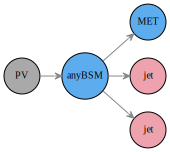

[PV, anyBSM, MET, jet, jet]
[(PV, anyBSM), (anyBSM, MET), (anyBSM, jet), (anyBSM, jet)]


In [3]:
elString = "[[['jet', 'jet']]]" 
el = ExpSMS.from_string(elString,model=finalStates)
el.draw()
print(el.nodes)
print(el.edges)

In [13]:
import sys
from smodels.experiment.databaseObj import Database
from smodels.base.model import Model
from smodels.decomposition import decomposer
from smodels.matching.theoryPrediction import theoryPredictionsFor
from smodels.base.physicsUnits import fb, GeV
from smodels.share.models.ppZpjj import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.smodelsLogging import setLogLevel
from smodels.base import runtime

setLogLevel("info")
runtime.modelFile = 'smodels.share.models.ppZpjj'

# Database path and SLHA file
path = "/home/yoxara/smodels/smodels-database"
slhaFile = "/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_18_tag_1.slha"

# Load database and model
db = Database(path)
analysis_list = ['CMS-EXO-19-012']
db.selectExpResults(analysisIDs=analysis_list, dataTypes='upperLimit', txnames='TRV1qq', useNonValidated=True)
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhaFile)

print(BSMList)

#print(db)


INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 3.0 secs.
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


[Y1, xd, xd~]


In [14]:
from pyslha import readSLHAFile
# Read the SLHA file
data = readSLHAFile(slhaFile)
# Extract all cross-section values 
xsecs = [x[0] for x in data.xsections]
# Set sigmacut to be 0.1% of the maximum cross-section value
sigmacut = 0.001 * max(xsecs) * fb
#sigmacut

#for x in data.xsections:
#    print(x)

# Decompose the model
topDict = decomposer.decompose(model, sigmacut, massCompress=True, invisibleCompress=True)
for top in topDict:
    print(top)
    # Get theory predictions
allPredictions = theoryPredictionsFor(db, topDict, combinedResults=False)
#allPredictions

1100
11101000


In [15]:
# Extract r-values, masses, and couplings
r_value = []
mass = []
coupling = []

for tp in allPredictions:
    r = tp.getRValue()
    r_value.append(r)


y1_mass = data.blocks['MASS'][5000001]
gvq = data.blocks['DMINPUTS'][4]

mass.append(y1_mass)
coupling.append(gvq)

print("R-values: ", r_value)
print("Masas y1: ", mass)
print("Acoplamientos gvq: ", coupling)


R-values:  []
Masas y1:  [3500.0]
Acoplamientos gvq:  [0.29149]


In [16]:
import time 
t0 = time.time()

# Access basic information from decomposition, using the topology list and topology objects:
print("\n Decomposition done in %1.2fm" %((time.time()-t0)/60.))
print("\n Decomposition Results: ")
print("\t  Total number of topologies: %i " % len(topDict))
nel = len(topDict.getSMSList())
print("\t  Total number of elements = %i " % nel)
# Print information about the m-th topology:
m = 2
if len(topDict) > m:
    cName = sorted(topDict.keys())[m]
    elementList = topDict[cName]
    print("\t\t %i topology  = " % cName)
    # Print information about the n-th element in the m-th topology:
    n = 0
    el = elementList[n]
    print("\t\t %i-th element  = " % (n), el, end="")
    print("\n\t\t\twith final states =", el.getFinalStates(), "\n\t\t\twith cross section =", el.weightList, "\n\t\t\tand masses = ", el.mass)


 Decomposition done in 0.00m

 Decomposition Results: 
	  Total number of topologies: 2 
	  Total number of elements = 2 


In [4]:

# Setting logging level and model file
setLogLevel("info")
runtime.modelFile = 'smodels.share.models.ppZpjj'

# Define path to database and SLHA file
path = "/home/yoxara/smodels/smodels-database"
slhaFile = "/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_18_tag_1.slha"

# Load database and select specific analysis and topology results
db = Database(path)
analysis_list = ['CMS-EXO-19-012']
db.selectExpResults(analysisIDs=analysis_list, dataTypes='upperLimit', txnames='TRV1qq', useNonValidated=True)

# Load and update model from SLHA file
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhaFile)

# Decompose the model to get the topologies
topList = decomposer.decompose(model, sigmacut=0.03 * fb)

predictionsList = theoryPredictionsFor(db, topList)

# Fetch and print the theory predictions for the experimental results directly from the database
for theoryPred in predictionsList:
    txname_str = ", ".join([str(txname) for txname in theoryPred.txnames])  # Convert each txname object to string
    print(f"Result: {theoryPred.expResult.globalInfo.id}, TxNames: {txname_str}, Cross-section: {theoryPred.xsection} fb")

# Print the BSM particle list
print(BSMList)

# Fetch and print the theory predictions for the experimental results directly from the database
for theoryPred in predictionsList:
    txname_str = ", ".join([str(txname) for txname in theoryPred.txnames])  # Convert each txname object to string
    
    # Extract theoretical cross-section and experimental upper limit
    sigma_theory = theoryPred.xsection
    sigma_exp_upper_limit = theoryPred.getUpperLimit()

    sigma_theory_value = float(sigma_theory.asNumber(fb))
    sigma_exp_upper_limit_value = float(sigma_exp_upper_limit.asNumber(fb))

    # Compute r-value
    r_value = sigma_theory_value / sigma_exp_upper_limit_value if sigma_exp_upper_limit_value else None

    print(f"Result: {theoryPred.expResult.globalInfo.id}, TxNames: {txname_str}, Cross-section (theory): {sigma_theory} pb, r-value: {r_value}")


INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 2.1 secs.
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section: 6.18E-03 [pb] fb
[Y1, xd, xd~]
Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 6.18E-03 [pb] pb, r-value: 0.32452548845976026


In [5]:
# Setting logging level and model file
setLogLevel("info")
runtime.modelFile = 'smodels.share.models.ppZpjj'

# Define path to database
path = "/home/yoxara/smodels/smodels-database"

# Create a list of all SLHA files
slhaFiles = [f"/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_{str(i).zfill(2)}_tag_1.slha" for i in range(1, 35)]

# Load database and select specific analysis and topology results
db = Database(path)
analysis_list = ['CMS-EXO-19-012']
db.selectExpResults(analysisIDs=analysis_list, dataTypes='upperLimit', txnames='TRV1qq', useNonValidated=True)

for slhaFile in slhaFiles:
    # Load and update model from SLHA file
    model = Model(BSMparticles=BSMList, SMparticles=SMList)
    model.updateParticles(inputFile=slhaFile)

    # Decompose the model to get the topologies
    topList = decomposer.decompose(model, sigmacut=0.03 * fb)

    predictionsList = theoryPredictionsFor(db, topList)

    # Fetch and print the theory predictions for the experimental results directly from the database
    for theoryPred in predictionsList:
        txname_str = ", ".join([str(txname) for txname in theoryPred.txnames])
        
        # Extract theoretical cross-section and experimental upper limit
        sigma_theory = theoryPred.xsection
        sigma_exp_upper_limit = theoryPred.getUpperLimit()
        sigma_theory_value = float(sigma_theory.asNumber(fb))
        sigma_exp_upper_limit_value = float(sigma_exp_upper_limit.asNumber(fb))
        
        # Compute r-value
        r_value = sigma_theory_value / sigma_exp_upper_limit_value if sigma_exp_upper_limit_value else None

        print(f"SLHA: {slhaFile}, Result: {theoryPred.expResult.globalInfo.id}, TxNames: {txname_str}, Cross-section (theory): {sigma_theory} pb, r-value: {r_value}")


INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 2.6 secs.
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_01_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 1.31E-02 [pb] pb, r-value: 0.17164366689502794
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_02_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 2.45E-02 [pb] pb, r-value: 0.1443223022956343
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_03_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 2.26E-02 [pb] pb, r-value: 0.14979862080751213
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_04_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 1.89E-02 [pb] pb, r-value: 0.16574877761334705
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_05_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cr

INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_11_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 8.56E-03 [pb] pb, r-value: 0.1721023043744579
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_12_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 7.87E-03 [pb] pb, r-value: 0.16529171750679283
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_13_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 7.64E-03 [pb] pb, r-value: 0.15874594078601775
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_14_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 6.92E-03 [pb] pb, r-value: 0.18098311249978818
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_15_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cr

INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_19_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 6.03E-03 [pb] pb, r-value: 0.2785447374087425
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_20_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 5.91E-03 [pb] pb, r-value: 0.22455537710793333
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_21_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 5.82E-03 [pb] pb, r-value: 0.22739321778411986
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_22_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 6.13E-03 [pb] pb, r-value: 0.251432181385601
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_23_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cros

INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles


SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_26_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 7.44E-03 [pb] pb, r-value: 0.5646619125294012
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_27_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 8.54E-03 [pb] pb, r-value: 0.5709036956410307
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_28_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 9.79E-03 [pb] pb, r-value: 0.4768057437677172
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_29_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross-section (theory): 1.15E-02 [pb] pb, r-value: 0.5146844482573402
SLHA: /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_30_tag_1.slha, Result: CMS-EXO-19-012, TxNames: TRV1qq, Cross

INFO in model.updateParticles() in 415: Loaded 3 BSM particles
INFO in model.updateParticles() in 415: Loaded 3 BSM particles
